# Example 1: Sandstone Model

In [1]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")
sys.path.append("../")
# Importing GeMpy modules
import gempy as GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib inline

In [3]:
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.create_data([696000,747000,6863000,6950000,-20000, 200],[ 50, 50, 50],
                         path_f = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")

# Assigning series to formations as well as their order (timewise)
GeMpy.set_data_series(geo_data, {"EarlyGranite_Series":geo_data.formations[-1], 
                      "BIF_Series":(geo_data.formations[0], geo_data.formations[1]),
                      "SimpleMafic_Series":geo_data.formations[2]}, 
                       order_series = ["EarlyGranite_Series",
                                       "BIF_Series",
                                       "SimpleMafic_Series"], verbose=0)

In [4]:
GeMpy.data_to_pickle(geo_data, 'sandstone')

In [5]:
inter = GeMpy.InterpolatorInput(geo_data)

I am in the setting
float32
I am here
[2, 2]


In [8]:
inter.interpolator.tg.n_formation.get_value()

array([1, 2, 3, 4])

In [2]:
import numpy as np
np.zeros((100,0))

array([], shape=(100, 0), dtype=float64)

In [5]:
100000/1000

100.0

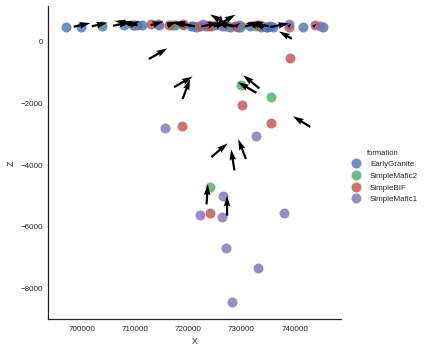

In [3]:
GeMpy.plot_data(geo_data)

In [3]:
geo_data.formations

array(['SimpleMafic2', 'SimpleBIF', 'SimpleMafic1', 'EarlyGranite'], dtype=object)

In [5]:
di = GeMpy.InterpolatorInput(geo_data)

I am in the setting
float32
I am here
[2, 2]


In [8]:
di.data.get_formation_number()

{'DefaultBasement': 0,
 'EarlyGranite': 1,
 'SimpleBIF': 3,
 'SimpleMafic1': 4,
 'SimpleMafic2': 2}

In [4]:
geo_data_s = GeMpy.select_series(geo_data, ['EarlyGranite_Series'])

In [4]:
# Preprocessing data to interpolate: This rescales the coordinates between 0 and 1 for stability issues.
# Here we can choose also the drift degree (in new updates I will change it to be possible to change the
# grade after compilation). From here we can set also the data type of the operations in case you want to
# use the GPU. Verbose is huge. There is a large list of strings that select what you want to print while
# the computation.
data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float32",
                                     verbose=[])

AttributeError: module 'gempy' has no attribute 'set_interpolator'

In [6]:
# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
#Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep() 

# Compile the theano function.
debugging = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(), on_unused_input='ignore',
                            allow_input_downcast=True, profile=True)

[9 9 9]


In [12]:
%%timeit
# Solve model calling the theano function
sol = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])


1 loop, best of 3: 5.34 s per loop


In [16]:
lith = sol[-1,0,:]

In [17]:
np.save('sandstone_lith', lith)

In [22]:
a = geo_data.grid.grid[:,0].astype(bool)

In [12]:
a2 = a.reshape(50,50,50)

In [16]:
a2[:,:,0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [17]:
geo_data.grid.grid

array([[  696000.      ,  6863000.      ,   -20000.      ],
       [  696000.      ,  6863000.      ,   -19551.019531],
       [  696000.      ,  6863000.      ,   -19102.041016],
       ..., 
       [  747000.      ,  6950000.      ,     1102.040771],
       [  747000.      ,  6950000.      ,     1551.020386],
       [  747000.      ,  6950000.      ,     2000.      ]], dtype=float32)

In [20]:
50*50

2500

In [18]:
geo_data.data_to_pickle('sandstone')

In [21]:
a2 = a1[:2500]



NameError: name 'a1' is not defined

In [30]:
g = geo_data.grid.grid
h = geo_data.grid.grid[:2500]

In [33]:
%%timeit
eu(g,h)

1 loop, best of 3: 1.73 s per loop


In [11]:
def squared_euclidean_distances(x_1, x_2):
    """
    Compute the euclidian distances in 3D between all the points in x_1 and x_2
    Args:
        x_1 (theano.tensor.matrix): shape n_points x number dimension
        x_2 (theano.tensor.matrix): shape n_points x number dimension

    Returns:
        theano.tensor.matrix: Distancse matrix. shape n_points x n_points
    """

    # T.maximum avoid negative numbers increasing stability


    return sqd

In [24]:
x_1 = T.matrix()
x_2 = T.matrix()

sqd = T.sqrt(T.maximum(
    (x_1**2).sum(1).reshape((x_1.shape[0], 1)) +
    (x_2**2).sum(1).reshape((1, x_2.shape[0])) -
    2 * x_1.dot(x_2.T), 0
))
eu = theano.function([x_1, x_2], sqd)

MemoryError: 
Apply node that caused the error: Elemwise{add,no_inplace}(Reshape{2}.0, Reshape{2}.0)
Toposort index: 15
Inputs types: [TensorType(float32, col), TensorType(float32, row)]
Inputs shapes: [(125000, 1), (1, 125000)]
Inputs strides: [(4, 4), (500000, 4)]
Inputs values: ['not shown', 'not shown']
Inputs type_num: [11, 11]
Outputs clients: [[Elemwise{sub,no_inplace}(Elemwise{add,no_inplace}.0, Elemwise{mul,no_inplace}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-49bfe268a453>", line 6, in <module>
    (x_2**2).sum(1).reshape((1, x_2.shape[0])) -

Debugprint of the apply node: 
Elemwise{add,no_inplace} [id A] <TensorType(float32, matrix)> ''   
 |Reshape{2} [id B] <TensorType(float32, col)> ''   
 | |Sum{axis=[1], acc_dtype=float64} [id C] <TensorType(float32, vector)> ''   
 | | |Elemwise{pow,no_inplace} [id D] <TensorType(float32, matrix)> ''   
 | |   |<TensorType(float32, matrix)> [id E] <TensorType(float32, matrix)>
 | |   |TensorConstant{(1, 1) of 2} [id F] <TensorType(int8, (True, True))>
 | |MakeVector{dtype='int64'} [id G] <TensorType(int64, vector)> ''   
 |   |Subtensor{int64} [id H] <TensorType(int64, scalar)> ''   
 |   | |Shape [id I] <TensorType(int64, vector)> ''   
 |   | | |<TensorType(float32, matrix)> [id E] <TensorType(float32, matrix)>
 |   | |Constant{0} [id J] <int64>
 |   |TensorConstant{1} [id K] <TensorType(int64, scalar)>
 |Reshape{2} [id L] <TensorType(float32, row)> ''   
   |Sum{axis=[1], acc_dtype=float64} [id M] <TensorType(float32, vector)> ''   
   | |Elemwise{pow,no_inplace} [id N] <TensorType(float32, matrix)> ''   
   |   |<TensorType(float32, matrix)> [id O] <TensorType(float32, matrix)>
   |   |TensorConstant{(1, 1) of 2} [id F] <TensorType(int8, (True, True))>
   |MakeVector{dtype='int64'} [id P] <TensorType(int64, vector)> ''   
     |TensorConstant{1} [id K] <TensorType(int64, scalar)>
     |Subtensor{int64} [id Q] <TensorType(int64, scalar)> ''   
       |Shape [id R] <TensorType(int64, vector)> ''   
       | |<TensorType(float32, matrix)> [id O] <TensorType(float32, matrix)>
       |Constant{0} [id J] <int64>

Storage map footprint:
 - <TensorType(float32, matrix)>, Input, Shape: (125000, 3), ElemSize: 4 Byte(s), TotalSize: 1500000 Byte(s)
 - <TensorType(float32, matrix)>, Input, Shape: (125000, 3), ElemSize: 4 Byte(s), TotalSize: 1500000 Byte(s)
 - Reshape{2}.0, Shape: (1, 125000), ElemSize: 4 Byte(s), TotalSize: 500000 Byte(s)
 - Reshape{2}.0, Shape: (125000, 1), ElemSize: 4 Byte(s), TotalSize: 500000 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1, 1) of 2}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1, 1) of 0}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 TotalSize: 4000018.0 Byte(s) 0.004 GB
 TotalSize inputs: 3000018.0 Byte(s) 0.003 GB



In [16]:
from evtk.hl import gridToVTK 

import numpy as np 

# Dimensions 


nx, ny, nz = 50, 50, 50 

lx = geo_data.extent[0]-geo_data.extent[1]
ly = geo_data.extent[2]-geo_data.extent[3]
lz = geo_data.extent[4]-geo_data.extent[5]

dx, dy, dz = lx/nx, ly/ny, lz/nz 

ncells = nx * ny * nz 

npoints = (nx + 1) * (ny + 1) * (nz + 1) 

# Coordinates 

x = np.arange(0, lx + 0.1*dx, dx, dtype='float64') 

y = np.arange(0, ly + 0.1*dy, dy, dtype='float64') 

z = np.arange(0, lz + 0.1*dz, dz, dtype='float64') 

x += geo_data.extent[0]
y +=geo_data.extent[2]
z +=geo_data.extent[5]

# Variables 
 
litho = sol[-1,0,:].reshape( (nx, ny, nz))



gridToVTK("./sandstone", x, y, z, cellData = {"lithology" : litho},) 

'/home/miguel/PycharmProjects/GeMpy/Prototype Notebook/sandstone.vtr'

In [13]:
geo_data.extent[4]

-20000

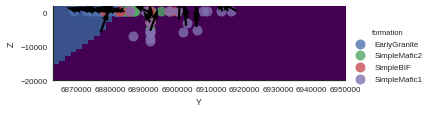

In [14]:
# Plot the block model. 
GeMpy.plot_section(geo_data, 13,  block = sol[-1,0,:], direction='x', plot_data = True)

In [6]:
geo_res = pn.read_csv('olaqases.vox')

In [7]:
geo_res = geo_res.iloc[9:]


In [8]:
geo_res['nx 50'].unique(), geo_data.formations

(array(['Murchison', 'EarlyGranite', 'SimpleMafic', 'SimpleBIF', 'SimpleMafic2', 'out'], dtype=object),
 array(['SimpleMafic2', 'SimpleBIF', 'SimpleMafic1', 'EarlyGranite'], dtype=object))

In [46]:
ip_addresses = geo_data.interfaces["formation"].unique()
ip_dict = dict(zip(ip_addresses, range(1, len(ip_addresses) + 1)))
ip_dict['Murchison'] = 0
ip_dict['out'] = 0
ip_dict['SimpleMafic'] = 4
geo_res_num = geo_res['nx 50'].replace(ip_dict)


In [47]:
geo_res_num

9         0
10        0
11        0
12        0
13        0
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
         ..
124979    0
124980    0
124981    0
124982    0
124983    0
124984    0
124985    0
124986    0
124987    0
124988    0
124989    0
124990    0
124991    0
124992    0
124993    0
124994    0
124995    0
124996    0
124997    0
124998    0
124999    0
125000    0
125001    0
125002    0
125003    0
125004    0
125005    0
125006    0
125007    0
125008    0
Name: nx 50, dtype: int64

In [48]:
ip_dict

{'EarlyGranite': 1,
 'Murchison': 0,
 'SimpleBIF': 3,
 'SimpleMafic': 4,
 'SimpleMafic1': 4,
 'SimpleMafic2': 2,
 'out': 0}

In [49]:
(geo_res_num.shape[0]), sol[-1,0,:].shape[0]

(125000, 125000)

In [50]:
sol[-1,0, :][7]

0.0

In [52]:
geo_res_num:

SyntaxError: invalid syntax (<ipython-input-52-5e3f8ae6fad0>, line 1)

In [53]:
geo_res_num.as_matrix().astype(int)

array([0, 0, 0, ..., 0, 0, 0])

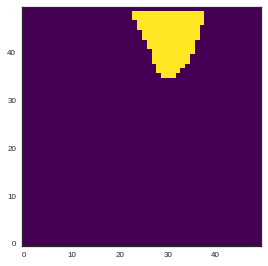

In [76]:
plt.imshow( geo_res_num.as_matrix().reshape(50, 50, 50)[:, 23, :],  origin="bottom", cmap="viridis" )

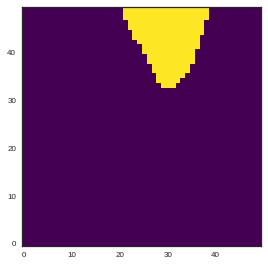

In [77]:
plt.imshow( sol[-1,0,:].reshape(50, 50, 50)[:, 23, :].T,  origin="bottom", cmap="viridis" )

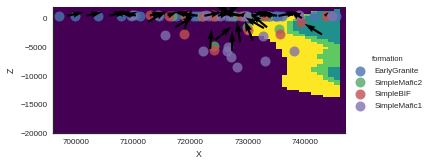

In [59]:
# Plot the block model. 
GeMpy.plot_section(geo_data, 13,  block = geo_res_num.as_matrix(), direction='y', plot_data = True)

In [57]:
50*50*50

125000

In [78]:
np.unique(sol[-1,0,:])

array([ 0.,  1.,  2.,  3.,  4.])

In [79]:
# Formation number and formation
data_interp.interfaces.groupby('formation number').formation.unique()

formation number
1    [EarlyGranite]
2    [SimpleMafic2]
3       [SimpleBIF]
4    [SimpleMafic1]
Name: formation, dtype: object

In [ ]:
data_interp.interpolator.tg.u_grade_T.get_value()

In [ ]:
np.unique(sol)

In [ ]:
#np.save('SandstoneSol', sol)
np.count_nonzero(np.load('SandstoneSol.npy') == sol)

In [ ]:
sol.shape

In [12]:
GeMpy.PlotData(geo_data).plot3D_steno(sol[-1,0,:], 'Sandstone', description='The sandstone model')


>> Welcome to the Python client library for Steno3D!

Credentials file found: /home/miguel/.steno3d_client/credentials
Accessing API developer key for @leguark
Welcome to Steno3D! You are logged in as @leguark
Verifying your quota for public projects...
This PUBLIC project will be viewable by everyone.
Total progress: 100% - Uploading: project Sandstone
Complete!
https://steno3d.com/resource/volume/BWCZxkJUmmdHurZg3mGs


In [18]:
np.linspace(geo_data.extent[0], geo_data.extent[1], geo_data.resolution[0], retstep=True)

(array([ 696000.      ,  697307.692308,  698615.384615,  699923.076923,  701230.769231,  702538.461538,  703846.153846,
         705153.846154,  706461.538462,  707769.230769,  709076.923077,  710384.615385,  711692.307692,  713000.      ,
         714307.692308,  715615.384615,  716923.076923,  718230.769231,  719538.461538,  720846.153846,  722153.846154,
         723461.538462,  724769.230769,  726076.923077,  727384.615385,  728692.307692,  730000.      ,  731307.692308,
         732615.384615,  733923.076923,  735230.769231,  736538.461538,  737846.153846,  739153.846154,  740461.538462,
         741769.230769,  743076.923077,  744384.615385,  745692.307692,  747000.      ]),
 1307.6923076923076)

In [8]:
np.diff(np.linspace(geo_data.extent[0], geo_data.extent[1], geo_data.resolution[0], retstep=False)).shape

(39,)

In [21]:
(geo_data.extent[1]- geo_data.extent[0])/ geo_data.resolution[0]-4

1271.0

In [25]:
(geo_data.extent[1]- geo_data.extent[0])/39

1307.6923076923076

In [12]:
# So far this is a simple 3D visualization. I have to adapt it into GeMpy 

lith0 = sol == 0
lith1 = sol == 1
lith2 = sol == 2
lith3 = sol == 3
lith4 = sol == 4
np.unique(sol)

import ipyvolume.pylab as p3

p3.figure(width=800)

p3.scatter(geo_data.grid.grid[:,0][lith0],
           geo_data.grid.grid[:,1][lith0],
           geo_data.grid.grid[:,2][lith0], marker='box', color = 'blue', size = 0.1 )

p3.scatter(geo_data.grid.grid[:,0][lith1],
           geo_data.grid.grid[:,1][lith1],
           geo_data.grid.grid[:,2][lith1], marker='box', color = 'yellow', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith2],
           geo_data.grid.grid[:,1][lith2],
           geo_data.grid.grid[:,2][lith2], marker='box', color = 'green', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith3],
           geo_data.grid.grid[:,1][lith3],
           geo_data.grid.grid[:,2][lith3], marker='box', color = 'pink', size = 1 )

p3.scatter(geo_data.grid.grid[:,0][lith4],
           geo_data.grid.grid[:,1][lith4],
           geo_data.grid.grid[:,2][lith4], marker='box', color = 'red', size = 1 )

p3.xlim(np.min(geo_data.grid.grid[:,0]),np.min(geo_data.grid.grid[:,0])+2175.0*40)
p3.ylim(np.min(geo_data.grid.grid[:,1]),np.max(geo_data.grid.grid[:,1]))
p3.zlim(np.min(geo_data.grid.grid[:,2]),np.min(geo_data.grid.grid[:,2])+2175.0*40)#np.max(geo_data.grid.grid[:,2]))

p3.show()

In [11]:
# The profile at the moment sucks because all what is whithin a scan is not subdivided
debugging.profile.summary()

Function profiling
  Message: <ipython-input-6-22dcf15bad61>:3
  Time in 5 calls to Function.__call__: 1.357155e+01s
  Time in Function.fn.__call__: 1.357096e+01s (99.996%)
  Time in thunks: 1.357014e+01s (99.990%)
  Total compile time: 2.592983e+01s
    Number of Apply nodes: 95
    Theano Optimizer time: 1.642699e+01s
       Theano validate time: 3.617525e-02s
    Theano Linker time (includes C, CUDA code generation/compiling): 9.462233e+00s
       Import time 1.913705e-01s
       Node make_thunk time 9.450990e+00s
           Node forall_inplace,cpu,scan_fn}(Elemwise{Maximum}[(0, 0)].0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, Subtensor{int64:int64:int8}.0, IncSubtensor{InplaceSet;:int64:}.0, grade of the universal drift, <TensorType(float64, matrix)>, <TensorType(float64, vector)>, Value of the formation, Position of the dips, Rest of the points of the layers, Reference 

#### Below here so far is deprecated

First we make a GeMpy instance with most of the parameters default (except range that is given by the project). Then we also fix the extension and the resolution of the domain we want to interpolate. Finally we compile the function, only needed once every time we open the project (the guys of theano they are working on letting loading compiled files, even though in our case it is not a big deal).

*General note. So far the reescaling factor is calculated for all series at the same time. GeoModeller does it individually for every potential field. I have to look better what this parameter exactly means*

All input data is stored in pandas dataframes under, ```self.Data.Interances``` and ```self.Data.Foliations```:

In case of disconformities, we can define which formation belong to which series using a dictionary. Until python 3.6 is important to specify the order of the series otherwise is random

Now in the data frame we should have the series column too

Next step is the creating of a grid. So far only regular. By default it takes the extent and the resolution given in the `import_data` method.

In [6]:
# Create a class Grid so far just regular grid
#GeMpy.set_grid(geo_data)
#GeMpy.get_grid(geo_data)

## Plotting raw data

The object Plot is created automatically as we call the methods above. This object contains some methods to plot the data and the results.

It is possible to plot a 2D projection of the data in a specific direction using the following method. Also is possible to choose the series you want to plot. Additionally all the key arguments of seaborn lmplot can be used.

In [7]:
#GeMpy.plot_data(geo_data, 'y', geo_data.series.columns.values[1])

## Class Interpolator

This class will take the data from the class Data and calculate potential fields and block. We can pass as key arguments all the variables of the interpolation. I recommend not to touch them if you do not know what are you doing. The default values should be good enough. Also the first time we execute the method, we will compile the theano function so it can take a bit of time.

In [10]:
%debug

> /home/bl3/PycharmProjects/GeMpy/GeMpy/GeMpy.py(46)rescale_data()
     44 
     45     new_coord_extent = _np.zeros_like(geo_data.extent)
---> 46     new_coord_extent[:2] = geo_data.extent[:2] - centers[0] / rescaling_factor + 0.5001
     47     new_coord_extent[2:4] = geo_data.extent[2:4] - centers[1] / rescaling_factor + 0.5001
     48     new_coord_extent[4:6] = geo_data.extent[4:6] - centers[2] / rescaling_factor + 0.5001

ipdb> geo_data.extent[:2]
[696000, 747000]
ipdb> centers[0]
396789.0625
ipdb> new_coord_extent[:2]
array([0, 0])
ipdb> geo_data.extent[:2] - centers[0] / rescaling_factor + 0.5001
*** TypeError: unsupported operand type(s) for -: 'list' and 'float'
ipdb> geo_data.extent[:2] - centers[0] / rescaling_factor
*** TypeError: unsupported operand type(s) for -: 'list' and 'float'
ipdb> geo_data.extent[:2] - centers[0]
*** TypeError: unsupported operand type(s) for -: 'list' and 'float'
ipdb> centers[0]
396789.0625
ipdb> geo_data.extent[:

In [9]:
geo_data.interpolator.results

[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 array([[ 0.343335,       inf,       inf, ..., -0.000003, -0.000002, -0.000002],
        [      inf,  0.343335,       inf, ..., -0.000003, -0.000002, -0.000002],
        [      inf,       inf,  0.343335, ..., -0.000003, -0.000002, -0.000002],
        ..., 
        [-0.000003, -0.000003, -0.000003, ...,  0.      ,  0.      ,  0.      ],
        [-0.000002, -0.000002, -0.000002, ...,  0.      ,  0.      ,  0.      ],
        [-0.000002, -0.000002, -0.000002, ...,  0.      ,  0.      ,  0.      ]]),
 array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 array([[ 0.      ,  0.407196,  0.24

In [10]:
geo_data.interpolator.tg.c_o_T.get_value(), geo_data.interpolator.tg.a_T.get_value()

(array(253666666), array(103218))

In [9]:
geo_data.interpolator.compile_potential_field_function()

In [31]:
geo_data.interpolator.compute_potential_fields('BIF_Series',verbose = 3)

The serie formations are SimpleMafic2|SimpleBIF
The formations are: 
Layers 
                 X             Y            Z     formation      series
0   735484.817806  6.891936e+06 -1819.319309  SimpleMafic2  BIF_Series
1   729854.915982  6.891938e+06 -1432.263309  SimpleMafic2  BIF_Series
2   724084.267161  6.891939e+06 -4739.830309  SimpleMafic2  BIF_Series
3   733521.625000  6.895282e+06   521.555240  SimpleMafic2  BIF_Series
4   721933.375000  6.884592e+06   496.669295  SimpleMafic2  BIF_Series
5   724251.000000  6.886909e+06   484.550926  SimpleMafic2  BIF_Series
6   727316.313000  6.886460e+06   478.254423  SimpleMafic2  BIF_Series
7   729858.250000  6.887134e+06   484.259574  SimpleMafic2  BIF_Series
8   732699.250000  6.885040e+06   494.526481  SimpleMafic2  BIF_Series
9   716849.500000  6.887358e+06   508.981894  SimpleMafic2  BIF_Series
10  719017.625000  6.892218e+06   508.179387  SimpleMafic2  BIF_Series
11  739179.440691  6.891936e+06  -552.591309     SimpleBIF  BIF_Series

array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ..., 
       [[ nan,  nan, 

In [18]:
geo_data.interpolator.potential_fields

[array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ..., 
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan]],
 
        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ..., 
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan]],
 
        [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ..., 
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan]],
 
        ..

In [11]:
geo_data.interpolator.results

[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 array([[ 0.343335,       inf,       inf, ..., -0.000003, -0.000002, -0.000002],
        [      inf,  0.343335,       inf, ..., -0.000003, -0.000002, -0.000002],
        [      inf,       inf,  0.343335, ..., -0.000003, -0.000002, -0.000002],
        ..., 
        [-0.000003, -0.000003, -0.000003, ...,  0.      ,  0.      ,  0.      ],
        [-0.000002, -0.000002, -0.000002, ...,  0.      ,  0.      ,  0.      ],
        [-0.000002, -0.000002, -0.000002, ...,  0.      ,  0.      ,  0.      ]]),
 array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 array([[ 0.      ,  0.407196,  0.24

In [41]:
geo_data.interpolator.tg.c_resc.get_value()

array(48561)

Now we could visualize the individual potential fields as follow:

###  Early granite

In [ ]:
GeMpy.plot_potential_field(geo_data,10, n_pf=0)

### BIF Series

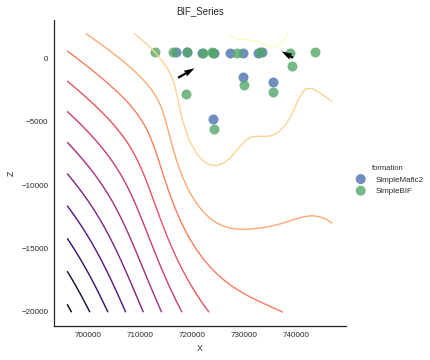

In [12]:
GeMpy.plot_potential_field(geo_data,13, n_pf=1, cmap = "magma",  plot_data = True,
                                        verbose = 5)

###  SImple mafic

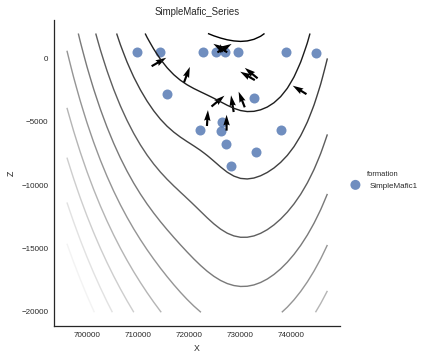

In [13]:
GeMpy.plot_potential_field(geo_data, 10, n_pf=2)

## Optimizing the export of lithologies

But usually the final result we want to get is the final block. The method `compute_block_model` will compute the block model, updating the attribute `block`. This attribute is a theano shared function that can return a 3D array (raveled) using the method `get_value()`.

In [7]:
GeMpy.compute_block_model(geo_data)

../GeMpy/GeMpy.py:38: UserWarning: Using default interpolation values
  warnings.warn('Using default interpolation values')


Final block computed

In [ ]:
#GeMpy.set_interpolator(geo_data, u_grade = 0, compute_potential_field=True)

And again after computing the model in the Plot object we can use the method `plot_block_section` to see a 2D section of the model

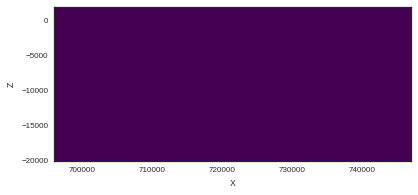

In [8]:
GeMpy.plot_section(geo_data, 13, direction='y')

## Export  to vtk. (*Under development*)

In [14]:
"""Export model to VTK

Export the geology blocks to VTK for visualisation of the entire 3-D model in an
external VTK viewer, e.g. Paraview.

..Note:: Requires pyevtk, available for free on: https://github.com/firedrakeproject/firedrake/tree/master/python/evtk

**Optional keywords**:
    - *vtk_filename* = string : filename of VTK file (default: output_name)
    - *data* = np.array : data array to export to VKT (default: entire block model)
"""
vtk_filename = "noddyFunct2"

extent_x = 10
extent_y = 10
extent_z = 10

delx = 0.2
dely = 0.2
delz = 0.2
from pyevtk.hl import gridToVTK
# Coordinates
x = np.arange(0, extent_x + 0.1*delx, delx, dtype='float64')
y = np.arange(0, extent_y + 0.1*dely, dely, dtype='float64')
z = np.arange(0, extent_z + 0.1*delz, delz, dtype='float64')

# self.block = np.swapaxes(self.block, 0, 2)
gridToVTK(vtk_filename, x, y, z, cellData = {"geology" : sol})

ImportError: No module named 'pyevtk'

## Performance Analysis

One of the advantages of theano is the posibility to create a full profile of the function. This has to be included in at the time of the creation of the function. At the moment it should be active (the downside is larger compilation time and I think also a bit in the computation so be careful if you need a fast call)

### CPU

The following profile is with a 2 core laptop. Nothing spectacular.

Looking at the profile we can see that most of time is in pow operation (exponential). This probably is that the extent is huge and we are doing it with too much precision. I am working on it

### GPU

In [16]:
%%timeit

# Compute the block
GeMpy.compute_block_model(geo_data, [0,1,2], verbose = 0)

1 loop, best of 3: 1.74 s per loop


In [17]:
geo_data.interpolator._interpolate.profile.summary()

Function profiling
  Message: ../GeMpy/DataManagement.py:994
  Time in 3 calls to Function.__call__: 8.400567e-01s
  Time in Function.fn.__call__: 8.395956e-01s (99.945%)
  Time in thunks: 8.275988e-01s (98.517%)
  Total compile time: 3.540267e+00s
    Number of Apply nodes: 342
    Theano Optimizer time: 2.592782e+00s
       Theano validate time: 1.640296e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 8.665011e-01s
       Import time 1.915064e-01s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 72.847s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  57.3%    57.3%       0.474s       2.87e-03s     C      165      55   theano.tensor.elemwise.Elemwise
  10.1%    67.4%       0.084s       2.79e-03s     C       30      10   theano.tensor.blas.Dot22Scalar
   9.6%    77.0%       0.079s       9.81e-04s     C       81      27   theano.sandbox.cuda.basic_ops.HostFromGpu
   6.4%    83.4%       0.05